In [3]:
%load_ext lab_black

In [4]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = Path("data/10.txt").read_text().splitlines()

X = 1
C = 0
S = 0
for cmd in data:
    f, *n = cmd.split()
    if f == "noop":
        C += 1
        if (C - 20) % 40 == 0:
            S += C * X
    else:
        n = int(n[0])
        for _ in range(2):
            C += 1
            if (C - 20) % 40 == 0:
                S += C * X
        X += n
S

13480

---

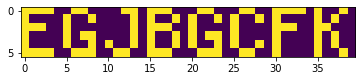

In [6]:
def draw_pixel(C, display, X):
    C += 1
    display[C // 40, C % 40] = int(C % 40 in [X - 1, X, X + 1])
    return C


data = Path("data/10.txt").read_text().splitlines()
display = np.zeros([6, 40], dtype=int)
C = -1
X = 1

for cmd in data:
    f, *n = cmd.split()
    if f == "noop":
        C = draw_pixel(C, display, X)
    else:
        C = draw_pixel(C, display, X)
        C = draw_pixel(C, display, X)

        X += int(n[0])

plt.imshow(display)